In [1]:
import pandas as pd

In [2]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install langid


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install googletrans==4.0.0-rc1
!pip install textblob

In [32]:
pip install translate

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [5]:
f = pd.read_csv("file209.csv")

In [65]:
f.tail(1)

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated,T,Sentiment_Score,Translated_P,T_S_P,Sent_Sc_P
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...,I really enjoyed this place!!Apreciei demais e...,I Apreciei,I appreciated,0.25,Gostei muito deste lugar!!Apreciei demais este...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.0


In [67]:
f["starRating"].unique()

array(['FIVE', 'FOUR', 'TWO', 'THREE', 'ONE'], dtype=object)

In [68]:
f["starRating"].replace('ONE', 1, inplace = True)
f["starRating"].replace('TWO', 2, inplace = True)
f["starRating"].replace('THREE', 3, inplace = True)
f["starRating"].replace('FOUR', 4, inplace = True)
f["starRating"].replace('FIVE', 5, inplace = True)

# Cleaning Text

In [7]:
import pandas as pd

# Assuming you have a DataFrame named 'f' with a column named 'comment'
# Replace the sample data with your actual DataFrame

# Function to clean the text
def clean_text(text):
    if pd.notna(text):  # Check for NaN values
        # Remove "(Translated by Google)"
        text = text.replace('(Translated by Google)', '')

        # Remove "\n\n(Original)\n"
        text = text.replace('\n\n(Original)\n', '')

        # Remove "\" 
        text = text.replace('\\', '')

        return text.strip()  # Remove leading and trailing whitespaces
    else:
        return text  # Return NaN if the input is NaN

# Apply the cleaning function to each row in the 'comment' column
f['cleaned_text'] = f['comment'].apply(clean_text)



In [8]:
# Display the updated DataFrame with the cleaned text column
f.tail(2)


,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text
266,{'displayName': 'Marilda Fatima da Silva'},FIVE,NaN,2018-11-16T20:32:39.223279Z,2018-11-16T20:32:39.223279Z,accounts/113838515205835963900/locations/41527...,Marilda Fatima da Silva,Marilda Fatima da Silva,ChZDSUhNMG9nS0VJQ0FnSUNJbnZia0pREAE,NaN,NaN
267,{'displayName': 'Giovanna Sanchez'},FIVE,NaN,2018-11-15T20:19:37.060735Z,2018-11-15T20:19:37.060735Z,accounts/113838515205835963900/locations/41527...,Giovanna Sanchez,Giovanna Sanchez,ChdDSUhNMG9nS0VJQ0FnSUNJcnRISHd3RRAB,NaN,NaN


In [9]:
# Assuming you have a DataFrame df
f.dropna(subset=['cleaned_text'], inplace=True)

# Display the DataFrame after dropping rows with missing values in 'cleaned_text'
f.head(2)

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text
0,{'displayName': 'Alessandro Filipe (Alê)'},FIVE,(Translated by Google) Camping is pretty cool\...,2017-08-02T01:33:16.793Z,2017-08-02T01:33:16.793Z,accounts/113838515205835963900/locations/41527...,Alessandro Filipe (Alê),Alessandro Filipe (Alê),ChZDSUhNMG9nS0VJQ0FnSURRekxMMFhnEAE,NaN,Camping is pretty coolO camping é bem legal
1,{'displayName': 'Rilvana Pinheiro'},FIVE,(Translated by Google) Wonderful place to spen...,2017-07-31T22:03:13.250Z,2017-07-31T22:03:13.250Z,accounts/113838515205835963900/locations/41527...,Rilvana Pinheiro,Rilvana Pinheiro,ChZDSUhNMG9nS0VJQ0FnSUNBMXBEOURnEAE,NaN,Wonderful place to spend a day with the family...


In [10]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 264
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer       168 non-null    object
 1   starRating     168 non-null    object
 2   comment        168 non-null    object
 3   createTime     168 non-null    object
 4   updateTime     168 non-null    object
 5   name           168 non-null    object
 6   displayName    159 non-null    object
 7   reviewer_name  159 non-null    object
 8   review_id      159 non-null    object
 9   reviewReply    28 non-null     object
 10  cleaned_text   168 non-null    object
dtypes: object(11)
memory usage: 15.8+ KB


In [11]:
from textblob import TextBlob

# Assuming you have a DataFrame df with a column named 'cleaned_text'
mixed_language_text = f["cleaned_text"].str.cat(sep=' ')

blob = TextBlob(mixed_language_text)
sentiment = blob.sentiment

print(f"Sentiment: {sentiment.polarity}")


Sentiment: 0.44216325414634516


In [12]:
from textblob import TextBlob

# Assuming you have a DataFrame df with a column named 'cleaned_text'
for index, row in f.iterrows():
    # Check if the value is not NaN
    if not pd.isnull(row['cleaned_text']):
        # Convert the value to a string
        text = str(row['cleaned_text'])
        
        # Perform sentiment analysis
        blob = TextBlob(text)
        sentiment = blob.sentiment
        print(f"Row {index + 1} Sentiment: {sentiment.polarity}")
    else:
        print(f"Row {index + 1} has NaN value in 'cleaned_text'")


Row 1 Sentiment: 0.225
Row 2 Sentiment: 0.7000000000000001
Row 3 Sentiment: 0.5
Row 4 Sentiment: 1.0
Row 5 Sentiment: 0.8
Row 6 Sentiment: 0.5708333333333333
Row 7 Sentiment: 0.13
Row 9 Sentiment: 0.4122222222222222
Row 10 Sentiment: 0.26875
Row 13 Sentiment: 0.39046875000000003
Row 14 Sentiment: 0.2
Row 15 Sentiment: 0.6
Row 16 Sentiment: 1.0
Row 17 Sentiment: 0.48444444444444446
Row 19 Sentiment: 0.3833333333333333
Row 21 Sentiment: 0.0
Row 22 Sentiment: -0.11875000000000002
Row 23 Sentiment: 0.5
Row 24 Sentiment: 0.75
Row 25 Sentiment: 0.74375
Row 27 Sentiment: 0.6
Row 30 Sentiment: 0.6875
Row 31 Sentiment: 0.9
Row 32 Sentiment: -0.08393939393939395
Row 34 Sentiment: 0.52515625
Row 39 Sentiment: 0.6
Row 46 Sentiment: 0.0
Row 47 Sentiment: 0.7
Row 48 Sentiment: 1.0
Row 49 Sentiment: 0.0
Row 53 Sentiment: 0.9099999999999999
Row 55 Sentiment: 0.39166666666666666
Row 56 Sentiment: 0.30000000000000004
Row 57 Sentiment: 0.7722222222222223
Row 58 Sentiment: 0.2
Row 59 Sentiment: 0.0
Row 60

In [13]:
import langid
import pandas as pd

# Assuming you have a DataFrame df with a column named 'cleaned_text'

# Function to identify language
def identify_language(text):
    lang, _ = langid.classify(text)
    return lang

# Iterate through every row in the 'cleaned_text' column
for index, row in f.iterrows():
    cleaned_text = row['cleaned_text']
    
    # Check if the value is not NaN
    if not pd.isnull(cleaned_text):
        identified_language = identify_language(cleaned_text)
        print(f"Row {index + 1}: The identified language is: {identified_language}")
    else:
        print(f"Row {index + 1}: 'cleaned_text' is NaN")


Row 1: The identified language is: fr
Row 2: The identified language is: pt
Row 3: The identified language is: en
Row 4: The identified language is: pt
Row 5: The identified language is: la
Row 6: The identified language is: es
Row 7: The identified language is: pt
Row 9: The identified language is: en
Row 10: The identified language is: pt
Row 13: The identified language is: en
Row 14: The identified language is: en
Row 15: The identified language is: pt
Row 16: The identified language is: pt
Row 17: The identified language is: en
Row 19: The identified language is: la
Row 21: The identified language is: rw
Row 22: The identified language is: en
Row 23: The identified language is: en
Row 24: The identified language is: pt
Row 25: The identified language is: la
Row 27: The identified language is: es
Row 30: The identified language is: pt
Row 31: The identified language is: es
Row 32: The identified language is: pt
Row 34: The identified language is: en
Row 39: The identified language i

In [14]:
f.tail()

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text
257,{'displayName': 'sirLuis'},FIVE,(Translated by Google) Great environment for t...,2022-10-29T15:47:36.562692Z,2022-10-29T15:47:36.562692Z,accounts/113838515205835963900/locations/41527...,sirLuis,sirLuis,ChdDSUhNMG9nS0VJQ0FnSUMtM0ltRWtBRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Great environment for those looking for a hone...
258,{'displayName': 'Ivete Alves Da Silva'},FOUR,(Translated by Google) Good\n\n(Original)\nBom,2022-10-28T20:34:56.619859Z,2022-10-28T20:36:05.214993Z,accounts/113838515205835963900/locations/41527...,Ivete Alves Da Silva,Ivete Alves Da Silva,ChZDSUhNMG9nS0VJQ0FnSUMteksyTmZBEAE,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",GoodBom
259,{'displayName': 'Milo Homens Alves'},FIVE,(Translated by Google) Too much!\n\n(Original)...,2022-10-28T18:11:23.675220Z,2022-10-28T18:11:23.675220Z,accounts/113838515205835963900/locations/41527...,Milo Homens Alves,Milo Homens Alves,ChdDSUhNMG9nS0VJQ0FnSUMtek5TXzZRRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Too much!De mais!
262,{'displayName': 'Rene Meier'},FIVE,There is a beautiful place into the nature wit...,2018-11-17T00:35:54.360366Z,2018-11-17T00:35:54.360366Z,accounts/113838515205835963900/locations/41527...,Rene Meier,Rene Meier,ChZDSUhNMG9nS0VJQ0FnSUNvMmFTclpREAE,NaN,There is a beautiful place into the nature wit...
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...


In [15]:
from googletrans import Translator

translator = Translator()

def translate_text(text, target_language='en'):
    try:
        translation = translator.translate(text, dest=target_language)
        return translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        return text  # Return the original text in case of an error

# Apply the translation function to each row in the 'cleaned_text' column
f['Translated_Text'] = f['cleaned_text'].apply(translate_text)


In [24]:
f.tail(2)

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated
262,{'displayName': 'Rene Meier'},FIVE,There is a beautiful place into the nature wit...,2018-11-17T00:35:54.360366Z,2018-11-17T00:35:54.360366Z,accounts/113838515205835963900/locations/41527...,Rene Meier,Rene Meier,ChZDSUhNMG9nS0VJQ0FnSUNvMmFTclpREAE,NaN,There is a beautiful place into the nature wit...,There is a beautiful place into the nature wit...,There
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...,I really enjoyed this place!!Apreciei demais e...,I Apreciei


In [22]:
import re

# Assuming your DataFrame is named 'f' with a column 'Translated_Text'
f['Translated_Separated'] = f['cleaned_text'].apply(lambda x: ' '.join(re.findall('[A-Z][a-z]*', x)))

In [25]:
f.tail(2)

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated
262,{'displayName': 'Rene Meier'},FIVE,There is a beautiful place into the nature wit...,2018-11-17T00:35:54.360366Z,2018-11-17T00:35:54.360366Z,accounts/113838515205835963900/locations/41527...,Rene Meier,Rene Meier,ChZDSUhNMG9nS0VJQ0FnSUNvMmFTclpREAE,NaN,There is a beautiful place into the nature wit...,There is a beautiful place into the nature wit...,There
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...,I really enjoyed this place!!Apreciei demais e...,I Apreciei


In [26]:
from googletrans import Translator

translator = Translator()

def translate_text(text, target_language='en'):
    try:
        translation = translator.translate(text, dest=target_language)
        return translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        return text  # Return the original text in case of an error

# Apply the translation function to each row in the 'cleaned_text' column
f['T'] = f['Translated_Separated'].apply(translate_text)


Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType


In [28]:
f.tail(20)

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated,T
233,{'displayName': 'Sarah Heuser'},FIVE,(Translated by Google) Camping with great stru...,2023-07-27T09:54:20.357676Z,2023-07-27T09:54:20.357676Z,accounts/113838515205835963900/locations/41527...,Sarah Heuser,Sarah Heuser,ChdDSUhNMG9nS0VJQ0FnSUNwOFBUUTJnRRAB,NaN,Camping with great structure of bathrooms and ...,Camping with Great Structure of Bathrooms and ...,Camping Camping,Camping Camping
236,{'displayName': 'Matheus Cordeiro'},FIVE,(Translated by Google) I had a wonderful exper...,2023-07-25T00:05:52.357338Z,2023-07-25T00:05:52.357338Z,accounts/113838515205835963900/locations/41527...,Matheus Cordeiro,Matheus Cordeiro,ChdDSUhNMG9nS0VJQ0FnSURKOThxLW5BRRAB,NaN,"I had a wonderful experience, impeccable servi...","I HAD A Wonderful Experience, Impeccable Servi...",I Tive,I Tive
237,{'displayName': 'Soraya Rossi'},FIVE,(Translated by Google) Best camping in the reg...,2023-07-24T00:57:53.734931Z,2023-07-24T00:57:53.734931Z,accounts/113838515205835963900/locations/41527...,Soraya Rossi,Soraya Rossi,ChdDSUhNMG9nS0VJQ0FnSURKaC0yZzRnRRAB,NaN,Best camping in the region for sure!Melhor cam...,Best camping in the region for sure! Best camp...,Best Melhor,Best better
239,{'displayName': 'Eliane Isabel'},FOUR,(Translated by Google) We love the place very ...,2023-07-23T22:06:13.459073Z,2023-07-23T22:06:13.459073Z,accounts/113838515205835963900/locations/41527...,Eliane Isabel,Eliane Isabel,ChdDSUhNMG9nS0VJQ0FnSURKaDR5aWhRRRAB,NaN,We love the place very beautiful staff very po...,We love the place Very Beautiful Staff Very Po...,We I I Adoramos,We I I Adoramos
240,{'displayName': 'Ivanilda Dias de barros'},FIVE,(Translated by Google) Excellent place to rela...,2022-11-17T23:33:35.255557Z,2022-11-17T23:33:35.255557Z,accounts/113838515205835963900/locations/41527...,Ivanilda Dias de barros,Ivanilda Dias de barros,ChZDSUhNMG9nS0VJQ0FnSUMtXzUzSUxnEAE,"{'comment': '🧡💚', 'updateTime': '2022-12-13T15...",Excellent place to relax and have funLugar exc...,Excellent Place to Relax and Have Funlugar Exc...,Excellent Lugar,Excellent Lugar
241,{'displayName': 'rogerio barrinha'},THREE,(Translated by Google) I liked\n\n(Original)\n...,2022-11-17T23:18:54.255432Z,2022-11-17T23:18:54.255432Z,accounts/113838515205835963900/locations/41527...,rogerio barrinha,rogerio barrinha,ChZDSUhNMG9nS0VJQ0FnSUMtX19YNkR3EAE,"{'comment': '🧡💚', 'updateTime': '2022-12-13T15...",I likedGostei,I likedGostei,I Gostei,I liked
243,{'displayName': 'nadir cristina silva'},FIVE,(Translated by Google) wonderful place 🥰\n\n(O...,2021-02-20T04:49:43.022875Z,2022-11-16T22:56:32.052171Z,accounts/113838515205835963900/locations/41527...,nadir cristina silva,nadir cristina silva,ChdDSUhNMG9nS0VJQ0FnSUR5b0lTX293RRAB,"{'comment': '🧡💚', 'updateTime': '2022-12-13T15...",wonderful place 🥰LUGAR maravilhoso 🥰,Wonderful Place 🥰 Wonderful Lugar 🥰,L U G A R,L U G A R
244,{'displayName': 'Tania Olivato'},FIVE,(Translated by Google) Great\n\n(Original)\nEx...,2022-11-16T18:52:23.131930Z,2022-11-16T18:52:23.131930Z,accounts/113838515205835963900/locations/41527...,Tania Olivato,Tania Olivato,ChdDSUhNMG9nS0VJQ0FnSUMtejhXRDBRRRAB,"{'comment': '🧡💚', 'updateTime': '2022-12-13T15...",GreatExcelente,GreatExcelente,Great Excelente,Great Excelente
247,{'displayName': 'Alberto Pessutti'},FIVE,"(Translated by Google) Very good, clean bathro...",2022-11-09T19:07:06.585805Z,2022-11-09T19:07:06.585805Z,accounts/113838515205835963900/locations/41527...,Alberto Pessutti,Alberto Pessutti,ChdDSUhNMG9nS0VJQ0FnSUMtdGVtQi1RRRAB,"{'comment': '🧡💚', 'updateTime': '2022-12-13T15...","Very good, clean bathrooms, great pools, I rec...","Very Good, Clean Bathrooms, Great Pools, I Rec...",Very I Muito,Very i
249,{'displayName': 'Marco Antonio Lima'},FIVE,"(Translated by Google) Wonderful place, family...",2022-11-06T05:43:43.999672Z,2022-11-06T05:43:43.999672Z,accounts/11

In [30]:
# Function to perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity

# Add a new column 'Sentiment_Score' to the DataFrame
f['Sentiment_Score'] = f['Translated_Text'].apply(analyze_sentiment)

In [31]:
f.tail()

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated,T,Sentiment_Score
257,{'displayName': 'sirLuis'},FIVE,(Translated by Google) Great environment for t...,2022-10-29T15:47:36.562692Z,2022-10-29T15:47:36.562692Z,accounts/113838515205835963900/locations/41527...,sirLuis,sirLuis,ChdDSUhNMG9nS0VJQ0FnSUMtM0ltRWtBRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Great environment for those looking for a hone...,Great Environment for Those Looking For Honeym...,Great The The It I Ambiente O O Foi,Great The The It I Ambiente O O Foi,0.309357
258,{'displayName': 'Ivete Alves Da Silva'},FOUR,(Translated by Google) Good\n\n(Original)\nBom,2022-10-28T20:34:56.619859Z,2022-10-28T20:36:05.214993Z,accounts/113838515205835963900/locations/41527...,Ivete Alves Da Silva,Ivete Alves Da Silva,ChZDSUhNMG9nS0VJQ0FnSUMteksyTmZBEAE,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",GoodBom,Goodbom,Good Bom,Good Bom,0.000000
259,{'displayName': 'Milo Homens Alves'},FIVE,(Translated by Google) Too much!\n\n(Original)...,2022-10-28T18:11:23.675220Z,2022-10-28T18:11:23.675220Z,accounts/113838515205835963900/locations/41527...,Milo Homens Alves,Milo Homens Alves,ChdDSUhNMG9nS0VJQ0FnSUMtek5TXzZRRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Too much!De mais!,Too much!De mais!,Too De,Too De,0.000000
262,{'displayName': 'Rene Meier'},FIVE,There is a beautiful place into the nature wit...,2018-11-17T00:35:54.360366Z,2018-11-17T00:35:54.360366Z,accounts/113838515205835963900/locations/41527...,Rene Meier,Rene Meier,ChZDSUhNMG9nS0VJQ0FnSUNvMmFTclpREAE,NaN,There is a beautiful place into the nature wit...,There is a beautiful place into the nature wit...,There,There,0.775000
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...,I really enjoyed this place!!Apreciei demais e...,I Apreciei,I appreciated,0.250000


In [34]:
from translate import Translator
import pandas as pd

# Assuming you have a DataFrame df with a column named 'cleaned_text'
translator = Translator(to_lang='pt')

# Function to translate text to Portuguese
def translate_text_to_portuguese(text):
    translation = translator.translate(text)
    return translation

# Add a new column 'Translated_Text' to the DataFrame
f['Translated_P'] = f['cleaned_text'].apply(translate_text_to_portuguese)

# Display the tail of the DataFrame
#print("\nTail of the DataFrame with Translated_Text:")
f.tail()


,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated,T,Sentiment_Score,Translated_P
257,{'displayName': 'sirLuis'},FIVE,(Translated by Google) Great environment for t...,2022-10-29T15:47:36.562692Z,2022-10-29T15:47:36.562692Z,accounts/113838515205835963900/locations/41527...,sirLuis,sirLuis,ChdDSUhNMG9nS0VJQ0FnSUMtM0ltRWtBRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Great environment for those looking for a hone...,Great Environment for Those Looking For Honeym...,Great The The It I Ambiente O O Foi,Great The The It I Ambiente O O Foi,0.309357,QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY...
258,{'displayName': 'Ivete Alves Da Silva'},FOUR,(Translated by Google) Good\n\n(Original)\nBom,2022-10-28T20:34:56.619859Z,2022-10-28T20:36:05.214993Z,accounts/113838515205835963900/locations/41527...,Ivete Alves Da Silva,Ivete Alves Da Silva,ChZDSUhNMG9nS0VJQ0FnSUMteksyTmZBEAE,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",GoodBom,Goodbom,Good Bom,Good Bom,0.000000,GoodBom
259,{'displayName': 'Milo Homens Alves'},FIVE,(Translated by Google) Too much!\n\n(Original)...,2022-10-28T18:11:23.675220Z,2022-10-28T18:11:23.675220Z,accounts/113838515205835963900/locations/41527...,Milo Homens Alves,Milo Homens Alves,ChdDSUhNMG9nS0VJQ0FnSUMtek5TXzZRRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Too much!De mais!,Too much!De mais!,Too De,Too De,0.000000,Demais!De mais!
262,{'displayName': 'Rene Meier'},FIVE,There is a beautiful place into the nature wit...,2018-11-17T00:35:54.360366Z,2018-11-17T00:35:54.360366Z,accounts/113838515205835963900/locations/41527...,Rene Meier,Rene Meier,ChZDSUhNMG9nS0VJQ0FnSUNvMmFTclpREAE,NaN,There is a beautiful place into the nature wit...,There is a beautiful place into the nature wit...,There,There,0.775000,Há um belo lugar na natureza com boas piscinas...
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...,I really enjoyed this place!!Apreciei demais e...,I Apreciei,I appreciated,0.250000,Gostei muito deste lugar!!Apreciei demais este...


In [38]:
f["Translated_P"].loc[257]

'QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY : 500 CHARS'

In [39]:
# Assuming your text is stored in a variable 'text' and there's a character limit of 500
max_chars = 500

# Split the text into chunks
text_chunks = [text[i:i+max_chars] for i in range(0, len(text), max_chars)]

# Process each chunk as needed
for chunk in text_chunks:
    # Perform actions on the chunk, such as sending it to an API
    print(chunk)


I really enjoyed this place!!Apreciei demais este local!!


In [40]:
f["Translated_P"].loc[257]

'QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY : 500 CHARS'

In [41]:
from translate import Translator
import pandas as pd

# Assuming you have a DataFrame df with a column named 'cleaned_text'
translator = Translator(to_lang='pt')

# Function to translate text to Portuguese
def translate_text_to_portuguese(text):
    translation = translator.translate(text)
    return translation

# Add a new column 'Translated_Text' to the DataFrame
f['T_S_P'] = f['Translated_Separated'].apply(translate_text_to_portuguese)

# Display the tail of the DataFrame
#print("\nTail of the DataFrame with Translated_Text:")
f.tail()


,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated,T,Sentiment_Score,Translated_P,T_S_P
257,{'displayName': 'sirLuis'},FIVE,(Translated by Google) Great environment for t...,2022-10-29T15:47:36.562692Z,2022-10-29T15:47:36.562692Z,accounts/113838515205835963900/locations/41527...,sirLuis,sirLuis,ChdDSUhNMG9nS0VJQ0FnSUMtM0ltRWtBRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Great environment for those looking for a hone...,Great Environment for Those Looking For Honeym...,Great The The It I Ambiente O O Foi,Great The The It I Ambiente O O Foi,0.309357,QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
258,{'displayName': 'Ivete Alves Da Silva'},FOUR,(Translated by Google) Good\n\n(Original)\nBom,2022-10-28T20:34:56.619859Z,2022-10-28T20:36:05.214993Z,accounts/113838515205835963900/locations/41527...,Ivete Alves Da Silva,Ivete Alves Da Silva,ChZDSUhNMG9nS0VJQ0FnSUMteksyTmZBEAE,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",GoodBom,Goodbom,Good Bom,Good Bom,0.000000,GoodBom,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
259,{'displayName': 'Milo Homens Alves'},FIVE,(Translated by Google) Too much!\n\n(Original)...,2022-10-28T18:11:23.675220Z,2022-10-28T18:11:23.675220Z,accounts/113838515205835963900/locations/41527...,Milo Homens Alves,Milo Homens Alves,ChdDSUhNMG9nS0VJQ0FnSUMtek5TXzZRRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Too much!De mais!,Too much!De mais!,Too De,Too De,0.000000,Demais!De mais!,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
262,{'displayName': 'Rene Meier'},FIVE,There is a beautiful place into the nature wit...,2018-11-17T00:35:54.360366Z,2018-11-17T00:35:54.360366Z,accounts/113838515205835963900/locations/41527...,Rene Meier,Rene Meier,ChZDSUhNMG9nS0VJQ0FnSUNvMmFTclpREAE,NaN,There is a beautiful place into the nature wit...,There is a beautiful place into the nature wit...,There,There,0.775000,Há um belo lugar na natureza com boas piscinas...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...,I really enjoyed this place!!Apreciei demais e...,I Apreciei,I appreciated,0.250000,Gostei muito deste lugar!!Apreciei demais este...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [42]:
f["T_S_P"].loc[257]

'MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  13 HOURS 16 MINUTES 43 SECONDS VISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE'

In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Function to perform sentiment analysis for Portuguese
def analyze_sentiment_portuguese(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

# Add a new column 'Sentiment_Score_Portuguese' to the DataFrame
f['Sent_Sc_P'] = f['Translated_P'].apply(analyze_sentiment_portuguese)


In [51]:
f.tail(5)

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated,T,Sentiment_Score,Translated_P,T_S_P,Sent_Sc_P
257,{'displayName': 'sirLuis'},FIVE,(Translated by Google) Great environment for t...,2022-10-29T15:47:36.562692Z,2022-10-29T15:47:36.562692Z,accounts/113838515205835963900/locations/41527...,sirLuis,sirLuis,ChdDSUhNMG9nS0VJQ0FnSUMtM0ltRWtBRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Great environment for those looking for a hone...,Great Environment for Those Looking For Honeym...,Great The The It I Ambiente O O Foi,Great The The It I Ambiente O O Foi,0.309357,QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.0
258,{'displayName': 'Ivete Alves Da Silva'},FOUR,(Translated by Google) Good\n\n(Original)\nBom,2022-10-28T20:34:56.619859Z,2022-10-28T20:36:05.214993Z,accounts/113838515205835963900/locations/41527...,Ivete Alves Da Silva,Ivete Alves Da Silva,ChZDSUhNMG9nS0VJQ0FnSUMteksyTmZBEAE,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",GoodBom,Goodbom,Good Bom,Good Bom,0.000000,GoodBom,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.0
259,{'displayName': 'Milo Homens Alves'},FIVE,(Translated by Google) Too much!\n\n(Original)...,2022-10-28T18:11:23.675220Z,2022-10-28T18:11:23.675220Z,accounts/113838515205835963900/locations/41527...,Milo Homens Alves,Milo Homens Alves,ChdDSUhNMG9nS0VJQ0FnSUMtek5TXzZRRRAB,"{'comment': '🧡💚', 'updateTime': '2022-11-06T11...",Too much!De mais!,Too much!De mais!,Too De,Too De,0.000000,Demais!De mais!,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.0
262,{'displayName': 'Rene Meier'},FIVE,There is a beautiful place into the nature wit...,2018-11-17T00:35:54.360366Z,2018-11-17T00:35:54.360366Z,accounts/113838515205835963900/locations/41527...,Rene Meier,Rene Meier,ChZDSUhNMG9nS0VJQ0FnSUNvMmFTclpREAE,NaN,There is a beautiful place into the nature wit...,There is a beautiful place into the nature wit...,There,There,0.775000,Há um belo lugar na natureza com boas piscinas...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.0
264,{'displayName': 'Rosa Ferrari'},FIVE,(Translated by Google) I really enjoyed this p...,2018-11-16T21:20:03.059487Z,2018-11-16T21:20:03.059487Z,accounts/113838515205835963900/locations/41527...,Rosa Ferrari,Rosa Ferrari,ChZDSUhNMG9nS0VJQ0FnSUNvNmQtRVl3EAE,NaN,I really enjoyed this place!!Apreciei demais e...,I really enjoyed this place!!Apreciei demais e...,I Apreciei,I appreciated,0.250000,Gostei muito deste lugar!!Apreciei demais este...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.0


In [58]:
f['Sent_Sc_P'].tail(5)

257    0.0
258    0.0
259    0.0
262    0.0
264    0.0
Name: Sent_Sc_P, dtype: float64

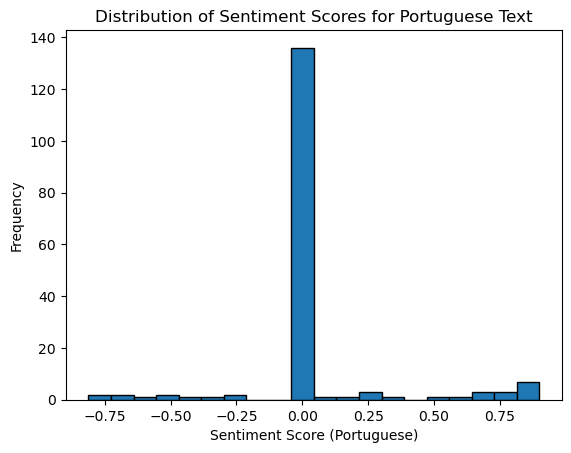

In [56]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'f' with a column 'Sent_Sc_P'
# Create a histogram of sentiment scores
plt.hist(f['Sent_Sc_P'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score (Portuguese)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for Portuguese Text')
plt.show()


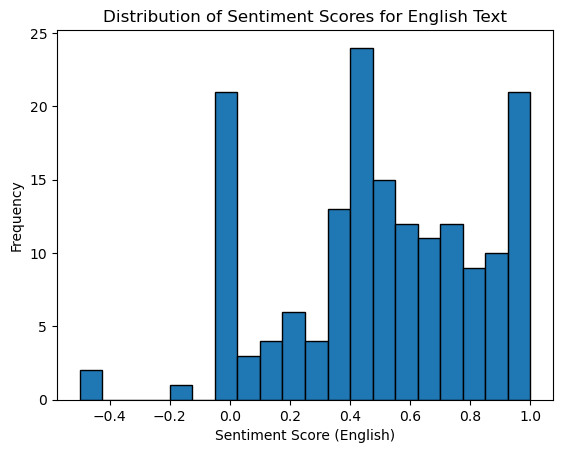

In [57]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'f' with a column 'Sent_Sc_P'
# Create a histogram of sentiment scores
plt.hist(f['Sentiment_Score'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score (English)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for English Text')
plt.show()


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming you have a DataFrame 'f' with a column 'Translated_Text'
documents = f["Translated_Text"].tolist()

# Create the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert the result to a DataFrame for better visualization
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW matrix
#print("Bag of Words Matrix:")
df.head()


,00,10,12,15,16,2009,22,30,abundant,abusive,...,wonderful,work,working,worth,year,years,you,your,zip,ziph
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample data
documents = f["Translated_Text"].tolist()

# Create the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X_tfidf = vectorizer.fit_transform(documents)

# Convert the result to a DataFrame for better visualization
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF matrix
#print("TF-IDF Matrix:")
df_tfidf.head()


,00,10,12,15,16,2009,22,30,abundant,abusive,...,wonderful,work,working,worth,year,years,you,your,zip,ziph
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.121952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.180649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
f.head(1)

,reviewer,starRating,comment,createTime,updateTime,name,displayName,reviewer_name,review_id,reviewReply,cleaned_text,Translated_Text,Translated_Separated,T,Sentiment_Score,Translated_P,T_S_P,Sent_Sc_P
0,{'displayName': 'Alessandro Filipe (Alê)'},5,(Translated by Google) Camping is pretty cool\...,2017-08-02T01:33:16.793Z,2017-08-02T01:33:16.793Z,accounts/113838515205835963900/locations/41527...,Alessandro Filipe (Alê),Alessandro Filipe (Alê),ChZDSUhNMG9nS0VJQ0FnSURRekxMMFhnEAE,NaN,Camping is pretty coolO camping é bem legal,Camping is pretty cool camping is very cool,Camping O,Camping O,0.351667,Acampar é bem legalO camping é bem legal,Acampamento O,0.128


In [74]:
ml = f[["starRating", "Translated_Text", "Sentiment_Score"]]

In [75]:
ml.head()

,starRating,Translated_Text,Sentiment_Score
0,5,Camping is pretty cool camping is very cool,0.351667
1,5,Wonderful Place to Spend a Day with the Family...,0.640000
2,4,Ok,0.500000
3,5,Wonderful Space and Experience with NatureMara...,1.000000
4,5,"It's Great for Taking Children, It has Water S...",0.800000


In [106]:
ml.loc[:, "word_count"] = ml["Translated_Text"].apply(lambda x: len(str(x).split(" ")))

In [107]:
ml.head(2)

,starRating,Translated_Text,Sentiment_Score,word_count
0,5,Camping is pretty cool camping is very cool,0.351667,8
1,5,Wonderful Place to Spend a Day with the Family...,0.640000,25


In [109]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

ml.loc[:, "avg_word"] = ml["Translated_Text"].apply(lambda x: avg_word(x))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_6112/2469324653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml.loc[:, "avg_word"] = ml["Translated_Text"].apply(lambda x: avg_word(x))


In [110]:
ml.head(2)

,starRating,Translated_Text,Sentiment_Score,word_count,avg_word
0,5,Camping is pretty cool camping is very cool,0.351667,8,4.50
1,5,Wonderful Place to Spend a Day with the Family...,0.640000,25,6.44


In [111]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/izaiaszacca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [114]:
ml.loc['stopwords'] = ml["Translated_Text"].apply(lambda x: len([x for x in x.split() if x in stop]))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_6112/2970951716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml.loc['stopwords'] = ml["Translated_Text"].apply(lambda x: len([x for x in x.split() if x in stop]))


In [115]:
ml.head()

,starRating,Translated_Text,Sentiment_Score,word_count,avg_word,stopwords
0,5.0,Camping is pretty cool camping is very cool,0.351667,8.0,4.500000,3.0
1,5.0,Wonderful Place to Spend a Day with the Family...,0.640000,25.0,6.440000,7.0
2,4.0,Ok,0.500000,1.0,2.000000,0.0
3,5.0,Wonderful Space and Experience with NatureMara...,1.000000,11.0,6.818182,4.0
4,5.0,"It's Great for Taking Children, It has Water S...",0.800000,40.0,5.125000,12.0


In [117]:
from nltk.tokenize import word_tokenize
import pandas as pd

# Example data
text_series = ml["Translated_Text"]

# Tokenize each element in the Series
tokenized_series = text_series.apply(lambda x: word_tokenize(str(x)))

print(tokenized_series)


0            [Camping, is, pretty, cool, camping, is, very,...
1            [Wonderful, Place, to, Spend, a, Day, with, th...
2                                                         [Ok]
3            [Wonderful, Space, and, Experience, with, Natu...
4            [It, 's, Great, for, Taking, Children, ,, It, ...
                                   ...                        
258                                                  [Goodbom]
259                                [Too, much, !, De, mais, !]
262          [There, is, a, beautiful, place, into, the, na...
264          [I, really, enjoyed, this, place, !, !, Apreci...
stopwords                                                [nan]
Name: Translated_Text, Length: 169, dtype: object


In [120]:
from nltk.tokenize import word_tokenize
import pandas as pd

# Example data
text_series = ml["Translated_Text"]

# Tokenize each element in the Series
tokenized_series = text_series.apply(lambda x: word_tokenize(str(x)))

# Convert each word to lowercase
lowercased_series = tokenized_series.apply(lambda tokens: [word.lower() for word in tokens])

# Add a new column to the DataFrame with the lowercase tokens
ml['Lowercased_Tokens'] = lowercased_series


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_6112/4252850327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['Lowercased_Tokens'] = lowercased_series


In [121]:
ml.head()

,starRating,Translated_Text,Sentiment_Score,word_count,avg_word,stopwords,Lowercased_Tokens
0,5.0,Camping is pretty cool camping is very cool,0.351667,8.0,4.500000,3.0,"[camping, is, pretty, cool, camping, is, very,..."
1,5.0,Wonderful Place to Spend a Day with the Family...,0.640000,25.0,6.440000,7.0,"[wonderful, place, to, spend, a, day, with, th..."
2,4.0,Ok,0.500000,1.0,2.000000,0.0,[ok]
3,5.0,Wonderful Space and Experience with NatureMara...,1.000000,11.0,6.818182,4.0,"[wonderful, space, and, experience, with, natu..."
4,5.0,"It's Great for Taking Children, It has Water S...",0.800000,40.0,5.125000,12.0,"[it, 's, great, for, taking, children, ,, it, ..."


In [138]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Example data
text_series = ml["Lowercased_Tokens"]

# Tokenize each element in the Series
tokenized_series = text_series.apply(lambda x: word_tokenize(str(x)))

# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
filtered_series = tokenized_series.apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Add a new column with the filtered tokens
ml['Filtered_Tokens'] = filtered_series


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_6112/2897488593.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['Filtered_Tokens'] = filtered_series


In [139]:
ml.head(2)

,starRating,Translated_Text,Sentiment_Score,word_count,avg_word,stopwords,Lowercased_Tokens,Filtered_Tokens,English_Words,Cleaned_Tokens
0,5.0,Camping is pretty cool camping is very cool,0.351667,8.0,4.50,3.0,"[camping, is, pretty, cool, camping, is, very,...","[[, 'camping, ', ,, 'is, ', ,, 'pretty, ', ,, ...","[Camping, is, pretty, cool, camping, is, very,...","[Camping, pretty, cool, camping, cool]"
1,5.0,Wonderful Place to Spend a Day with the Family...,0.640000,25.0,6.44,7.0,"[wonderful, place, to, spend, a, day, with, th...","[[, 'wonderful, ', ,, 'place, ', ,, 'to, ', ,,...","[Place, to, Spend, a, Day, with, the, Family, ...","[Wonderful, Place, Spend, Day, Family, Mainint..."


import langid
from nltk.tokenize import word_tokenize
import pandas as pd

# Example data
text_series = ml["Filtered_Tokens"]

# Tokenize each element in the Series
tokenized_series = text_series.apply(lambda x: word_tokenize(str(x)))

# Filter out words that are not in English
filtered_series = tokenized_series.apply(lambda tokens: [word for word in tokens if langid.classify(word)[0] == 'en'])

# Add a new column with the filtered tokens
ml['English_Words'] = filtered_series


ml.head(2)

In [142]:
import re
from nltk.tokenize import word_tokenize
import pandas as pd

# Example data
text_series = ml["Filtered_Tokens"]

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Convert the list of tokens to a single string
    text = ' '.join(text)
    # Remove special characters and punctuation
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)
    # Tokenize the cleaned text
    tokens = word_tokenize(cleaned_text)
    return tokens

# Tokenize and clean each element in the Series
tokenized_series = text_series.apply(clean_and_tokenize)

# Add a new column with the cleaned and tokenized text
ml['Cleaned_Tokens'] = tokenized_series

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_6112/4166833976.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['Cleaned_Tokens'] = tokenized_series


In [144]:
ml.head(2)

,starRating,Translated_Text,Sentiment_Score,word_count,avg_word,stopwords,Lowercased_Tokens,Filtered_Tokens,English_Words,Cleaned_Tokens
0,5.0,Camping is pretty cool camping is very cool,0.351667,8.0,4.50,3.0,"[camping, is, pretty, cool, camping, is, very,...","[[, 'camping, ', ,, 'is, ', ,, 'pretty, ', ,, ...","[[, ', [, ', ,, ``, 'camping, '', ,, ``, ', ''...","[camping, is, pretty, cool, camping, is, very,..."
1,5.0,Wonderful Place to Spend a Day with the Family...,0.640000,25.0,6.44,7.0,"[wonderful, place, to, spend, a, day, with, th...","[[, 'wonderful, ', ,, 'place, ', ,, 'to, ', ,,...","[[, ', [, ', ,, ``, '', ,, ``, ', '', ,, ', ,,...","[wonderful, place, to, spend, day, with, the, ..."


In [77]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [145]:
# Example data
texts = ml["Cleaned_Tokens"]
labels = ml["Sentiment_Score"]  # 1 for positive, 0 for negative (binary classification)


In [146]:
tokenizer = Tokenizer(num_words=5000)  # Adjust vocabulary size as needed
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=100)  # Adjust maxlen as needed


In [147]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=100))  # Adjust input_dim, output_dim, and input_length
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))  # Binary classification, use 'softmax' for multiclass
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [148]:
model.fit(padded_sequences, np.array(labels), epochs=10, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6937 - accuracy: 0.1185 - val_loss: nan - val_accuracy: 0.0882
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.1185 - val_loss: nan - val_accuracy: 0.0882
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.1185 - val_loss: nan - val_accuracy: 0.0882
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6763 - accuracy: 0.1407 - val_loss: nan - val_accuracy: 0.0882
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6714 - accuracy: 0.1630 - val_loss: nan - val_accuracy: 0.0882
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6661 - accuracy: 0.1778 - val_loss: nan - val_accuracy: 0.0882
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.1926 - val_loss: nan - val_accuracy: 0.0882
Epoch 8/10
5/5 [==============================] - 0s 5

In [149]:
test_texts = ["I really enjoyed this place!!Apreciei demais e.."]
test_sequences = tokenizer.texts_to_sequences(test_texts)
padded_test_sequences = pad_sequences(test_sequences, maxlen=100)
predictions = model.predict(padded_test_sequences)


1/1 [==============================] - 0s 22ms/step


In [150]:
predictions

array([[0.51386446]], dtype=float32)

In [151]:
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming binary_predictions and true_labels are defined
true_labels = [0.25]  # Replace with your actual labels

# Calculate metrics
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


ValueError: Classification metrics can't handle a mix of continuous and binary targets